In [720]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [548]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


# Import

In [800]:
user_id = pd.read_csv('/content/drive/MyDrive/BigData/Social_spammers_dataset/users/coded_ids.csv')
coded_id_lables_test = pd.read_csv('/content/drive/MyDrive/BigData/Social_spammers_dataset/users/coded_ids_labels_test.csv')
coded_id_lables_train = pd.read_csv('/content/drive/MyDrive/BigData/Social_spammers_dataset/users/coded_ids_labels_train.csv')
feature = pd.read_csv('/content/drive/MyDrive/BigData/Social_spammers_dataset/users_features/features.csv')

In [801]:
print("user_id",user_id.shape)
print("coded_id_lables_train",coded_id_lables_train.shape)
print("coded_id_lables_test",coded_id_lables_test.shape)
print("df",df.shape)

user_id (767, 2)
coded_id_lables_train (686, 2)
coded_id_lables_test (81, 2)
df (686, 143)


In [802]:
df= feature.copy()

In [803]:
user_id.head()

,coded_id,user_id
0,1,100338945
1,2,1084425186
2,3,1110273865
3,4,1132049448
4,5,1145742354


In [804]:
user_id.shape

(767, 2)

In [805]:
coded_id_lables_train.head()

,coded_id,label
0,1,1
1,2,0
2,3,0
3,4,1
4,6,0


In [806]:
coded_id_lables_test.head()

,coded_id,label
0,5,NaN
1,26,NaN
2,37,NaN
3,40,NaN
4,52,NaN


In [728]:
df

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,...,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset
0,0.055,2.600,5.308,21.087,2.333,2186,19 days 05:12:37.409091000,1660357.0,422,26/12/2017 14:45:25,29/10/2016 20:07:42,False,False,1.923,2.449,1.091,2.571,210,0.000,2606,604,36.704,71,-1931,2.500,ar,2,6,176 days 23:35:57.000000000,15291357.0,131,1,1,0.091,2,0.222,14772,0,0.0,1,...,1,1.0,0.973,0.227,0.232,11.500,NaN,11795,47 days 07:09:24.508885000,4.086565e+06,28.463421,0.281771,0.412471,0.036,0.576804,0.063,3283.636508,0.0,0.0,0.439109,0.039,5.114936,0.000,0.000,0.087,0.000,0.348,0.261,0.261,0.043,46,1.533333,Hawaii,5.396,10,5,5,2.000,494199648,-36000.0
1,154.333,3.447,13.164,463.000,1.045,1286,0 days 00:10:33.400433000,633.0,3,27/12/2014 22:46:34,24/12/2014 13:29:23,True,False,107.616,35.171,1.000,42.087,1224,0.143,7,-1995,1.000,7,-1995,1.546,en,0,15,0 days 06:08:01.000000000,22081.0,140,0,14,0.400,4,0.364,10535,0,0.0,1,...,49,0.0,0.500,0.283,0.374,463.000,NaN,14875,0 days 00:26:36.528837000,1.596529e+03,30.772790,0.000000,1.840109,0.069,0.692446,0.047,1084.810265,0.0,0.0,0.293260,0.019,6.577935,0.058,0.060,0.097,0.071,0.151,0.194,0.205,0.162,1141,38.033333,NaN,11.567,13,6,1,1.023,2708449765,NaN
2,40.000,9.938,8.329,400.000,1.000,2474,0 days 00:39:20.897243000,2361.0,10,10/02/2018 17:00:37,30/01/2018 19:20:39,False,False,12.881,57.269,1.000,53.000,305,0.000,4806,2804,6.675,720,-1282,2.783,en,0,14,1 days 18:22:38.000000000,152558.0,140,10,5,0.179,8,0.400,10206,0,0.0,1,...,12,0.0,0.870,0.307,0.286,400.000,NaN,87004,0 days 02:52:56.811122000,1.037681e+04,43.109393,0.616441,0.719444,0.030,0.809595,0.081,1172.022727,0.0,0.0,0.339034,0.028,8.286554,0.020,0.052,0.020,0.077,0.200,0.150,0.362,0.117,0,0.000000,Riyadh,35.167,19,2,1,1.000,293270197,10800.0
3,0.334,2.600,2.412,55.284,36.885,3220,16 days 16:04:30.509317000,1440271.0,485,04/07/2011 03:37:09,05/03/2010 06:21:35,True,False,3.846,7.049,2.930,4.229,0,0.062,17,-1985,0.944,18,-1984,2.000,en,0,10,673 days 21:00:01.000000000,58222801.0,139,1,2,0.222,1,0.125,2,0,0.0,2,...,22,0.0,0.486,0.288,0.343,23.143,NaN,163,58 days 12:50:08.084253000,5.057408e+06,20.459779,0.078325,0.265073,0.027,0.306474,0.022,0.156649,0.0,0.0,0.312080,0.058,4.215231,0.142,0.142,0.204,0.099,0.056,0.111,0.080,0.167

In [729]:
train_label = pd.merge(user_id, coded_id_lables_train,on="coded_id")
train_label

,coded_id,user_id,label
0,1,100338945,1
1,2,1084425186,0
2,3,1110273865,0
3,4,1132049448,1
4,6,1198055730,0
...,...,...,...
681,763,71337202,0
682,764,1886085126,0
683,765,117230308,0
684,766,1434337280,0


In [730]:
len(train_label[train_label.label== 0])

568

In [731]:
len(train_label[train_label.label== 1])

118

In [732]:
df.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,...,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset
0,0.055,2.600,5.308,21.087,2.333,2186,19 days 05:12:37.409091000,1660357.0,422,26/12/2017 14:45:25,29/10/2016 20:07:42,False,False,1.923,2.449,1.091,2.571,210,0.000,2606,604,36.704,71,-1931,2.500,ar,2,6,176 days 23:35:57.000000000,15291357.0,131,1,1,0.091,2,0.222,14772,0,0.0,1,...,1,1.0,0.973,0.227,0.232,11.500,NaN,11795,47 days 07:09:24.508885000,4.086565e+06,28.463421,0.281771,0.412471,0.036,0.576804,0.063,3283.636508,0.0,0.0,0.439109,0.039,5.114936,0.000,0.000,0.087,0.000,0.348,0.261,0.261,0.043,46,1.533333,Hawaii,5.396,10,5,5,2.000,494199648,-36000.0
1,154.333,3.447,13.164,463.000,1.045,1286,0 days 00:10:33.400433000,633.0,3,27/12/2014 22:46:34,24/12/2014 13:29:23,True,False,107.616,35.171,1.000,42.087,1224,0.143,7,-1995,1.000,7,-1995,1.546,en,0,15,0 days 06:08:01.000000000,22081.0,140,0,14,0.400,4,0.364,10535,0,0.0,1,...,49,0.0,0.500,0.283,0.374,463.000,NaN,14875,0 days 00:26:36.528837000,1.596529e+03,30.772790,0.000000,1.840109,0.069,0.692446,0.047,1084.810265,0.0,0.0,0.293260,0.019,6.577935,0.058,0.060,0.097,0.071,0.151,0.194,0.205,0.162,1141,38.033333,NaN,11.567,13,6,1,1.023,2708449765,NaN
2,40.000,9.938,8.329,400.000,1.000,2474,0 days 00:39:20.897243000,2361.0,10,10/02/2018 17:00:37,30/01/2018 19:20:39,False,False,12.881,57.269,1.000,53.000,305,0.000,4806,2804,6.675,720,-1282,2.783,en,0,14,1 days 18:22:38.000000000,152558.0,140,10,5,0.179,8,0.400,10206,0,0.0,1,...,12,0.0,0.870,0.307,0.286,400.000,NaN,87004,0 days 02:52:56.811122000,1.037681e+04,43.109393,0.616441,0.719444,0.030,0.809595,0.081,1172.022727,0.0,0.0,0.339034,0.028,8.286554,0.020,0.052,0.020,0.077,0.200,0.150,0.362,0.117,0,0.000000,Riyadh,35.167,19,2,1,1.000,293270197,10800.0
3,0.334,2.600,2.412,55.284,36.885,3220,16 days 16:04:30.509317000,1440271.0,485,04/07/2011 03:37:09,05/03/2010 06:21:35,True,False,3.846,7.049,2.930,4.229,0,0.062,17,-1985,0.944,18,-1984,2.000,en,0,10,673 days 21:00:01.000000000,58222801.0,139,1,2,0.222,1,0.125,2,0,0.0,2,...,22,0.0,0.486,0.288,0.343,23.143,NaN,163,58 days 12:50:08.084253000,5.057408e+06,20.459779,0.078325,0.265073,0.027,0.306474,0.022,0.156649,0.0,0.0,0.312080,0.058,4.215231,0.142,0.142,0.204,0.099,0.056,0.111,0.080,0.167

In [733]:
df = pd.merge(train_label, df, on="user_id")
df

,coded_id,user_id,label,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,...,proportion_retweets,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,utc_offset
0,1,100338945,1,0.640,1.000,2.000,382.405,42.353,2965,1 days 13:38:15.646617000,135496.0,625,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,5.000,1.000,1.046,9.421,0,0.016,38,-1964,1.652,23,-1979,1.000,en,93,11,154 days 02:21:18.000000000,13314078.0,119,3,3,0.250,2,0.133,3,...,0.000,7,0.0,0.623,0.337,0.323,200.000,NaN,660,12 days 03:44:10.929062000,1.050251e+06,16.317651,0.306910,0.165359,0.013,0.099875,0.007,0.242436,0.0,0.0,0.049937,0.025,3.180943,0.133,0.188,0.152,0.120,0.135,0.107,0.080,0.085,97,3.233333,London,0.223,1,3,19,23.471,0.0
1,2,1084425186,0,0.475,2.605,2.292,286.480,1.327,1855,2 days 02:38:39.540037000,182320.0,1133,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,31.095,125.673,1.878,165.753,333,0.010,227,-1775,0.439,517,-1485,1.421,ar,46,8,425 days 13:13:05.000000000,36767585.0,140,2,5,0.200,4,0.333,131447,...,0.507,34,6.0,0.305,0.349,0.415,179.333,NaN,2686,18 days 17:25:04.343801000,1.617904e+06,31.165663,0.128683,0.493084,0.025,0.574924,0.049,9246.874302,0.0,0.0,0.495401,0.029,6.222263,0.154,0.043,0.154,0.191,0.086,0.095,0.128,0.149,234,7.800000,NaN,1.448,7,13,3,1.128,NaN
2,3,1110273865,0,1.805,13.543,35.730,395.005,1.000,1846,0 days 13:20:12.744949000,48013.0,220,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,19.051,12.650,1.005,29.000,376,0.005,270,-1732,0.738,366,-1636,3.185,ar,0,8,6 days 22:46:53.000000000,600413.0,140,1,9,0.360,4,0.500,225509,...,0.854,27,0.0,0.425,0.276,0.327,198.500,NaN,19037,1 days 00:21:43.260440000,8.770326e+04,37.414564,0.050125,1.192264,0.056,0.463750,0.076,12009.243486,0.0,0.0,0.269721,0.018,8.057965,0.123,0.088,0.106,0.161,0.171,0.131,0.146,0.073,1,0.033333,NaN,10.313,20,8,0,1.000,NaN
3,4,1132049448,1,0.259,1.000,57.474,62.200,32.826,1838,3 days 21:20:06.945652000,336007.0,715,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,7.000,1.322,2.974,5.605,2,0.140,11,-1991,0.647,17,-1985,1.000,en,0,9,237 days 01:36:28.000000000,20482588.0,141,2,3,0.150,1,0.125,1,...,0.000,60,1.0,0.393,0.324,0.378,37.000,NaN,185,19 days 13:07:30.927306000,1.688851e+06,24.876827,0.260583,0.282222,0.013,0.491981,0.032,0.103411,0.0,0.0,0.220498,0.035,5.513063,0.108,0.119,0.103,0.184,0.211,0.059,0.146,0.070,4,0.133333,Amsterdam,0.101,10,1,20,1.736

In [734]:
df.shape

(686, 147)

# Cleaning

In [735]:
df.isnull().sum()

coded_id                               0
user_id                                0
label                                  0
active_tweeting_frequency_per_day      0
adjusted_nb_of_uses_of_hashtag         0
                                    ... 
tweets_with_at_top_20                  0
tweets_with_hashtags_top_20            0
tweets_with_urls_top_20                0
urls_used_on_average                   0
utc_offset                           168
Length: 147, dtype: int64

In [736]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['spam_in_screen_name', 'time_zone', 'utc_offset']

In [737]:
df[df.columns[df.isnull().any()]].isnull().sum()

spam_in_screen_name    686
time_zone              168
utc_offset             168
dtype: int64

In [738]:
df.drop(columns = df[['user_id','spam_in_screen_name','time_zone','utc_offset']],inplace= True)

In [739]:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [740]:
df.head()

,coded_id,label,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,...,portion_of_tweets_with_urls,proportion_original,proportion_replies,proportion_retweets,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average
0,1,1,0.640,1.000,2.000,382.405,42.353,2965,1 days 13:38:15.646617000,135496.0,625,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,5.000,1.000,1.046,9.421,0,0.016,38,-1964,1.652,23,-1979,1.000,en,93,11,154 days 02:21:18.000000000,13314078.0,119,3,3,0.250,2,0.133,3,0,...,0.998,0.998,0.003,0.000,7,0.0,0.623,0.337,0.323,200.000,660,12 days 03:44:10.929062000,1.050251e+06,16.317651,0.306910,0.165359,0.013,0.099875,0.007,0.242436,0.0,0.0,0.049937,0.025,3.180943,0.133,0.188,0.152,0.120,0.135,0.107,0.080,0.085,97,3.233333,0.223,1,3,19,23.471
1,2,0,0.475,2.605,2.292,286.480,1.327,1855,2 days 02:38:39.540037000,182320.0,1133,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,31.095,125.673,1.878,165.753,333,0.010,227,-1775,0.439,517,-1485,1.421,ar,46,8,425 days 13:13:05.000000000,36767585.0,140,2,5,0.200,4,0.333,131447,0,...,0.407,0.437,0.056,0.507,34,6.0,0.305,0.349,0.415,179.333,2686,18 days 17:25:04.343801000,1.617904e+06,31.165663,0.128683,0.493084,0.025,0.574924,0.049,9246.874302,0.0,0.0,0.495401,0.029,6.222263,0.154,0.043,0.154,0.191,0.086,0.095,0.128,0.149,234,7.800000,1.448,7,13,3,1.128
2,3,0,1.805,13.543,35.730,395.005,1.000,1846,0 days 13:20:12.744949000,48013.0,220,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,19.051,12.650,1.005,29.000,376,0.005,270,-1732,0.738,366,-1636,3.185,ar,0,8,6 days 22:46:53.000000000,600413.0,140,1,9,0.360,4,0.500,225509,0,...,0.071,0.008,0.139,0.854,27,0.0,0.425,0.276,0.327,198.500,19037,1 days 00:21:43.260440000,8.770326e+04,37.414564,0.050125,1.192264,0.056,0.463750,0.076,12009.243486,0.0,0.0,0.269721,0.018,8.057965,0.123,0.088,0.106,0.161,0.171,0.131,0.146,0.073,1,0.033333,10.313,20,8,0,1.000
3,4,1,0.259,1.000,57.474,62.200,32.826,1838,3 days 21:20:06.945652000,336007.0,715,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,7.000,1.322,2.974,5.605,2,0.140,11,-1991,0.647,17,-1985,1.000,en,0,9,237 days 01:36:28.000000000,20482588.0,141,2,3,0.150,1,0.125,1,0,...,0.973,0.978,0.022,0.000,60,1.0,0.393,0.324,0.378,37.000,185,19 days 13:07:30.927306000,1.688851e+06,24.876827,0.260583,0.282222,0.013,0.491981,0.032,0.103411,0.0,0.0,0.220498,0.035,5.513063,0.108,0.119,0.103,0.184,0.211,0.059,0.146,0.070,4,0

In [741]:
# select the float columns
df_num = df.select_dtypes(include=[np.float])
# select non-numeric columns
df_cat = df.select_dtypes(exclude=[np.number])
df_obj = df.select_dtypes(include=[np.object])

In [689]:
df_num

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,avg_intertweet_times_seconds,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,followees_per_followers_sq,followers_per_followees,hashtags_used_on_average,max_intertweet_times_seconds,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_word_in_the_tweet,mean_nb_characters_per_tweet,mean_nb_favourites_per_tweet,mean_nb_hashtags_per_tweet,mean_nb_hashtags_per_word_in_the_tweet,mean_nb_mentions_per_tweet,mean_nb_mentions_per_word_in_the_tweet,mean_nb_retweets_per_tweet,mean_nb_symbols_per_tweet,mean_nb_symbols_per_word_in_the_tweet,mean_nb_urls_per_tweet,mean_nb_urls_per_word_in_the_tweet,mean_nb_words_per_tweet,median_nb_characters_per_tweet,median_nb_favourites_per_tweet,median_nb_hashtags_per_tweet,median_nb_hashtags_per_word_in_the_tweet,median_nb_mentions_per_tweet,median_nb_mentions_per_word_in_the_tweet,median_nb_retweets_per_tweet,median_nb_symbols_per_tweet,median_nb_symbols_per_word_in_the_tweet,median_nb_urls_per_tweet,...,nb_mentions_per_day,nb_urls_per_day,numerals_ratio_in_screen_name,portion_of_tweets_with_hashtags,portion_of_tweets_with_medias,portion_of_tweets_with_mentions,portion_of_tweets_with_symbols,portion_of_tweets_with_urls,proportion_original,proportion_replies,proportion_retweets,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_months,tweeting_frequency_per_day,urls_used_on_average
0,0.640,1.000,2.000,382.405,42.353,135496.0,5.000,1.000,1.046,9.421,0.016,1.652,1.000,13314078.0,0.250,0.133,0.0,0.167,74.227500,0.057500,0.012500,0.001,0.005000,0.000,0.035000,0.0,0.0,0.997500,0.090,11.960000,72.5,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.0,...,0.003,0.638,0.000,0.007,0.000,0.003,0.0,0.998,0.998,0.003,0.000,0.0,0.623,0.337,0.323,200.000,1.050251e+06,16.317651,0.306910,0.165359,0.013,0.099875,0.007,0.242436,0.0,0.0,0.049937,0.025,3.180943,0.133,0.188,0.152,0.120,0.135,0.107,0.080,0.085,3.233333,0.223,23.471
1,0.475,2.605,2.292,286.480,1.327,182320.0,31.095,125.673,1.878,165.753,0.010,0.439,1.421,36767585.0,0.200,0.333,0.0,0.250,100.719331,0.013011,0.150558,0.008,0.535316,0.032,931.908922,0.0,0.0,0.408922,0.022,20.204461,103.0,0.0,0.0,0.000,1.0,0.029,1.0,0.0,0.0,0.0,...,0.254,0.194,0.375,0.113,0.067,0.506,0.0,0.407,0.437,0.056,0.507,6.0,0.305,0.349,0.415,179.333,1.617904e+06,31.165663,0.128683,0.493084,0.025,0.574924,0.049,9246.874302,0.0,0.0,0.495401,0.029,6.222263,0.154,0.043,0.154,0.191,0.086,0.095,0.128,0.149,7.800000,1.448,1.128
2,1.805,13.543,35.730,395.005,1.000,48013.0,19.051,12.650,1.005,29.000,0.005,0.738,3.185,600413.0,0.360,0.500,0.0,0.154,102.178841,0.002519,0.649874,0.030,1.138539,0.078,1486.068010,0.0,0.0,0.073048,0.004,20.146096,114.0,0.0,0.0,0.000,1.0,0.048,3.0,0.0,0.0,0.0,...,2.055,0.132,0.500,0.368,0.214,0.985,0.0,0.071,0.008,0.139,0.854,0.0,0.425,0.276,0.327,198.500,8.770326e+04,37.414564,0.050125,1.192264,0.056,0.463750,0.076,12009.243486,0.0,0.0,0.269721,0.018,8.057965,0.123,0.088,0.106,0.161,0.171,0.131,0.146,0.073,0.033333,10.313,1.000
3,0.259,1.000,57.474,62.200,32.826,336007.0,7.000,1.322,2.974,5.605,0.140,0.647,1.000,20482588.0,0.150,0.125,0.0,0.250,83.843243,0.048649,0.037838,0.002,0.410811,0.025,0.010811,0.0,0.0,0.994595,0.076,14.972973,80.0,0.0,0.0,0.000,

In [690]:
df_obj

,avg_intertweet_times,date_newest_tweet,date_oldest_tweet,lang,max_intertweet_times,min_intertweet_times,std_intertweet_times
0,1 days 13:38:15.646617000,05/11/2017 22:56:37,19/02/2016 05:30:34,en,154 days 02:21:18.000000000,0 days 00:00:10.000000000,12 days 03:44:10.929062000
1,2 days 02:38:39.540037000,22/06/2017 02:59:54,15/05/2014 23:00:01,ar,425 days 13:13:05.000000000,0 days 00:00:00.000000000,18 days 17:25:04.343801000
2,0 days 13:20:12.744949000,10/02/2018 03:11:26,05/07/2017 01:47:19,ar,6 days 22:46:53.000000000,0 days 00:00:02.000000000,1 days 00:21:43.260440000
3,3 days 21:20:06.945652000,07/02/2018 09:08:18,22/02/2016 19:27:00,en,237 days 01:36:28.000000000,0 days 00:00:40.000000000,19 days 13:07:30.927306000
4,0 days 03:15:03.255051000,10/02/2018 13:21:04,18/12/2017 21:59:35,ar,4 days 03:41:46.000000000,0 days 00:00:00.000000000,0 days 10:20:08.729922000
...,...,...,...,...,...,...,...
681,0 days 02:17:47.592965000,25/10/2017 16:22:34,06/10/2017 15:21:43,en,0 days 23:40:10.000000000,0 days 00:00:13.000000000,0 days 04:10:19.268595000
682,0 days 01:47:06.424242000,24/10/2017 13:16:00,09/10/2017 19:48:48,tr,0 days 19:32:19.000000000,0 days 00:00:02.000000000,0 days 03:58:22.860764000
683,0 days 04:18:12.422111000,24/10/2017 23:00:01,19/09/2017 06:36:49,en,2 days 10:40:33.000000000,0 days 00:00:12.000000000,0 days 06:59:52.264752000
684,0 days 02:12:39.306533000,24/10/2017 21:18:39,06/10/2017 13:20:17,en,0 days 21:16:02.000000000,0 days 00:00:00.000000000,0 days 04:50:08.059101000


In [691]:
df_cat

,avg_intertweet_times,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,lang,max_intertweet_times,min_intertweet_times,std_intertweet_times
0,1 days 13:38:15.646617000,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,en,154 days 02:21:18.000000000,0 days 00:00:10.000000000,12 days 03:44:10.929062000
1,2 days 02:38:39.540037000,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,ar,425 days 13:13:05.000000000,0 days 00:00:00.000000000,18 days 17:25:04.343801000
2,0 days 13:20:12.744949000,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,ar,6 days 22:46:53.000000000,0 days 00:00:02.000000000,1 days 00:21:43.260440000
3,3 days 21:20:06.945652000,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,en,237 days 01:36:28.000000000,0 days 00:00:40.000000000,19 days 13:07:30.927306000
4,0 days 03:15:03.255051000,10/02/2018 13:21:04,18/12/2017 21:59:35,False,False,ar,4 days 03:41:46.000000000,0 days 00:00:00.000000000,0 days 10:20:08.729922000
...,...,...,...,...,...,...,...,...,...
681,0 days 02:17:47.592965000,25/10/2017 16:22:34,06/10/2017 15:21:43,False,False,en,0 days 23:40:10.000000000,0 days 00:00:13.000000000,0 days 04:10:19.268595000
682,0 days 01:47:06.424242000,24/10/2017 13:16:00,09/10/2017 19:48:48,False,False,tr,0 days 19:32:19.000000000,0 days 00:00:02.000000000,0 days 03:58:22.860764000
683,0 days 04:18:12.422111000,24/10/2017 23:00:01,19/09/2017 06:36:49,False,False,en,2 days 10:40:33.000000000,0 days 00:00:12.000000000,0 days 06:59:52.264752000
684,0 days 02:12:39.306533000,24/10/2017 21:18:39,06/10/2017 13:20:17,False,False,en,0 days 21:16:02.000000000,0 days 00:00:00.000000000,0 days 04:50:08.059101000


In [692]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   avg_intertweet_times   686 non-null    object
 1   date_newest_tweet      686 non-null    object
 2   date_oldest_tweet      686 non-null    object
 3   default_profile        686 non-null    bool  
 4   default_profile_image  686 non-null    bool  
 5   lang                   686 non-null    object
 6   max_intertweet_times   686 non-null    object
 7   min_intertweet_times   686 non-null    object
 8   std_intertweet_times   686 non-null    object
dtypes: bool(2), object(7)
memory usage: 44.2+ KB


In [742]:
df['date_newest_tweet'] = pd.to_datetime(df['date_newest_tweet'])
df['date_oldest_tweet'] = pd.to_datetime(df['date_oldest_tweet'])

In [ ]:
df_cat

,avg_intertweet_times,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,lang,max_intertweet_times,min_intertweet_times,std_intertweet_times
0,1 days 13:38:15.646617000,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,en,154 days 02:21:18.000000000,0 days 00:00:10.000000000,12 days 03:44:10.929062000
1,2 days 02:38:39.540037000,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,ar,425 days 13:13:05.000000000,0 days 00:00:00.000000000,18 days 17:25:04.343801000
2,0 days 13:20:12.744949000,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,ar,6 days 22:46:53.000000000,0 days 00:00:02.000000000,1 days 00:21:43.260440000
3,3 days 21:20:06.945652000,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,en,237 days 01:36:28.000000000,0 days 00:00:40.000000000,19 days 13:07:30.927306000
4,0 days 03:15:03.255051000,10/02/2018 13:21:04,18/12/2017 21:59:35,False,False,ar,4 days 03:41:46.000000000,0 days 00:00:00.000000000,0 days 10:20:08.729922000
...,...,...,...,...,...,...,...,...,...
681,0 days 02:17:47.592965000,25/10/2017 16:22:34,06/10/2017 15:21:43,False,False,en,0 days 23:40:10.000000000,0 days 00:00:13.000000000,0 days 04:10:19.268595000
682,0 days 01:47:06.424242000,24/10/2017 13:16:00,09/10/2017 19:48:48,False,False,tr,0 days 19:32:19.000000000,0 days 00:00:02.000000000,0 days 03:58:22.860764000
683,0 days 04:18:12.422111000,24/10/2017 23:00:01,19/09/2017 06:36:49,False,False,en,2 days 10:40:33.000000000,0 days 00:00:12.000000000,0 days 06:59:52.264752000
684,0 days 02:12:39.306533000,24/10/2017 21:18:39,06/10/2017 13:20:17,False,False,en,0 days 21:16:02.000000000,0 days 00:00:00.000000000,0 days 04:50:08.059101000


In [743]:
avg_intertweet_times = []
for i in range(0, len(df_cat)):
    avg_intertweet_times.append(df_cat['avg_intertweet_times'][i].split(" ")[0])

date_newest_tweet = []
for i in range(0, len(df_cat)):
    date_newest_tweet.append(df_cat['date_oldest_tweet'][i].split(" ")[0])

date_oldest_tweet = []
for i in range(0, len(df_cat)):
    date_oldest_tweet.append(df_cat['date_oldest_tweet'][i].split(" ")[0])

max_intertweet_times = []
for i in range(0, len(df_cat)):
    max_intertweet_times.append(df_cat['max_intertweet_times'][i].split(" ")[0])

min_intertweet_times = []
for i in range(0, len(df_cat)):
    min_intertweet_times.append(df_cat['min_intertweet_times'][i].split(" ")[0])

std_intertweet_times = []
for i in range(0, len(df_cat)):
    std_intertweet_times.append(df_cat['std_intertweet_times'][i].split(" ")[0])

In [744]:
df_cat

,avg_intertweet_times,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,lang,max_intertweet_times,min_intertweet_times,std_intertweet_times
0,1 days 13:38:15.646617000,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,en,154 days 02:21:18.000000000,0 days 00:00:10.000000000,12 days 03:44:10.929062000
1,2 days 02:38:39.540037000,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,ar,425 days 13:13:05.000000000,0 days 00:00:00.000000000,18 days 17:25:04.343801000
2,0 days 13:20:12.744949000,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,ar,6 days 22:46:53.000000000,0 days 00:00:02.000000000,1 days 00:21:43.260440000
3,3 days 21:20:06.945652000,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,en,237 days 01:36:28.000000000,0 days 00:00:40.000000000,19 days 13:07:30.927306000
4,0 days 03:15:03.255051000,10/02/2018 13:21:04,18/12/2017 21:59:35,False,False,ar,4 days 03:41:46.000000000,0 days 00:00:00.000000000,0 days 10:20:08.729922000
...,...,...,...,...,...,...,...,...,...
681,0 days 02:17:47.592965000,25/10/2017 16:22:34,06/10/2017 15:21:43,False,False,en,0 days 23:40:10.000000000,0 days 00:00:13.000000000,0 days 04:10:19.268595000
682,0 days 01:47:06.424242000,24/10/2017 13:16:00,09/10/2017 19:48:48,False,False,tr,0 days 19:32:19.000000000,0 days 00:00:02.000000000,0 days 03:58:22.860764000
683,0 days 04:18:12.422111000,24/10/2017 23:00:01,19/09/2017 06:36:49,False,False,en,2 days 10:40:33.000000000,0 days 00:00:12.000000000,0 days 06:59:52.264752000
684,0 days 02:12:39.306533000,24/10/2017 21:18:39,06/10/2017 13:20:17,False,False,en,0 days 21:16:02.000000000,0 days 00:00:00.000000000,0 days 04:50:08.059101000


In [ ]:
# from datetime import datetime
# import datetime as dt

# df['date_newest_tweet_dates'] = pd.to_datetime(df['date_newest_tweet'], format='%Y:%M:%D').dt.date
# #df['date_newest_tweet_year'] = pd.to_datetime(df['date_newest_dates'], format='%Y:%M:%D').dt.day
# df['date_newest_tweet_hours'] = pd.to_datetime(df['date_newest_tweet'], format='%Y:%M:%D').dt.time

# df['date_oldest_tweet_dates'] = pd.to_datetime(df['date_oldest_tweet'], format='%Y:%M:%D').dt.date
# df['date_oldest_tweet_hours'] = pd.to_datetime(df['date_oldest_tweet'], format='%Y:%M:%D').dt.time

In [694]:
df = df.drop(['avg_intertweet_times', 'date_newest_tweet', 'date_oldest_tweet','max_intertweet_times','min_intertweet_times','std_intertweet_times'], axis=1)

In [695]:
cat_columns = ['default_profile', 'default_profile_image','lang']

In [696]:
df[cat_columns]

,default_profile,default_profile_image,lang
0,True,False,en
1,True,False,ar
2,True,False,ar
3,True,False,en
4,False,False,ar
...,...,...,...
681,False,False,en
682,False,False,tr
683,False,False,en
684,False,False,en


In [697]:
num_columns = df.copy()
num_columns = num_columns.drop(cat_columns, axis= 1)

In [698]:
num_columns.drop(['label'],axis= 1, inplace= True)
num_columns

,coded_id,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times_seconds,content_duration_days,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,len_description,len_screen_name,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,max_nb_urls_per_word_in_the_tweet,max_nb_words_per_tweet,mean_nb_characters_per_tweet,mean_nb_favourites_per_tweet,mean_nb_hashtags_per_tweet,mean_nb_hashtags_per_word_in_the_tweet,...,portion_of_tweets_with_symbols,portion_of_tweets_with_urls,proportion_original,proportion_replies,proportion_retweets,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,statuses_count,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average
0,1,0.640,1.000,2.000,382.405,42.353,2965,135496.0,625,5.000,1.000,1.046,9.421,0,0.016,38,-1964,1.652,23,-1979,1.000,93,11,13314078.0,119,3,3,0.250,2,0.133,3,0,0.0,1,0.167,25,74.227500,0.057500,0.012500,0.001,...,0.0,0.998,0.998,0.003,0.000,7,0.0,0.623,0.337,0.323,200.000,660,1.050251e+06,16.317651,0.306910,0.165359,0.013,0.099875,0.007,0.242436,0.0,0.0,0.049937,0.025,3.180943,0.133,0.188,0.152,0.120,0.135,0.107,0.080,0.085,97,3.233333,0.223,1,3,19,23.471
1,2,0.475,2.605,2.292,286.480,1.327,1855,182320.0,1133,31.095,125.673,1.878,165.753,333,0.010,227,-1775,0.439,517,-1485,1.421,46,8,36767585.0,140,2,5,0.200,4,0.333,131447,0,0.0,2,0.250,36,100.719331,0.013011,0.150558,0.008,...,0.0,0.407,0.437,0.056,0.507,34,6.0,0.305,0.349,0.415,179.333,2686,1.617904e+06,31.165663,0.128683,0.493084,0.025,0.574924,0.049,9246.874302,0.0,0.0,0.495401,0.029,6.222263,0.154,0.043,0.154,0.191,0.086,0.095,0.128,0.149,234,7.800000,1.448,7,13,3,1.128
2,3,1.805,13.543,35.730,395.005,1.000,1846,48013.0,220,19.051,12.650,1.005,29.000,376,0.005,270,-1732,0.738,366,-1636,3.185,0,8,600413.0,140,1,9,0.360,4,0.500,225509,0,0.0,2,0.154,35,102.178841,0.002519,0.649874,0.030,...,0.0,0.071,0.008,0.139,0.854,27,0.0,0.425,0.276,0.327,198.500,19037,8.770326e+04,37.414564,0.050125,1.192264,0.056,0.463750,0.076,12009.243486,0.0,0.0,0.269721,0.018,8.057965,0.123,0.088,0.106,0.161,0.171,0.131,0.146,0.073,1,0.033333,10.313,20,8,0,1.000
3,4,0.259,1.000,57.474,62.200,32.826,1838,336007.0,715,7.000,1.322,2.974,5.605,2,0.140,11,-1991,0.647,17,-1985,1.000,0,9,20482588.0,141,2,3,0.150,1,0.125,1,0,0.0,2,0.250,30,83.843243,0.048649,0.037838,0.002,...,0.0,0.973,0.978,0.022,0.000,60,1.0,0.393,0.324,0.378,37.000,185,1.688851e+06,24.876827,0.260583,0.282222,0.013,0.491981,0.032,0.103411,0.0,0.0,0.220498,0.035,5.513063,0.108,0.119,0.103,0.184,0.211,0.059,0.146,0.070,4,0.133333,0.101,10,1,20,1.736
4,6,7.491,4.300,7.408,395.005,1.022,1817,11703.0,53,70.460,66.143,1.005,87.044,138,0.000,1604,-398,1.848,868,-1134,1.674,100,7,358906.0,144,11,8,0.333,12,0.500,120398,0,0.0,1,0.200

In [699]:
X = df.loc[:, df.columns!='label']
y = df.loc[:, df.columns=='label']

In [ ]:
# import category_encoders as ce

# encoders = ce.JamesSteinEncoder(cols=cat_columns)
# encoders.fit(X, y)

# X_cleaned = encoders.transform(X)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [700]:
cat_columns = X.select_dtypes('object').columns
X = pd.get_dummies(X, columns=cat_columns, prefix=cat_columns)
X

,coded_id,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times_seconds,content_duration_days,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,len_description,len_screen_name,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,max_nb_urls_per_word_in_the_tweet,max_nb_words_per_tweet,mean_nb_characters_per_tweet,mean_nb_favourites_per_tweet,...,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,lang_ar,lang_ca,lang_da,lang_de,lang_en,lang_en-gb,lang_es,lang_fr,lang_it,lang_ja,lang_ko,lang_nl,lang_no,lang_pt,lang_ru,lang_sv,lang_tr,lang_zh-tw
0,1,0.640,1.000,2.000,382.405,42.353,2965,135496.0,625,True,False,5.000,1.000,1.046,9.421,0,0.016,38,-1964,1.652,23,-1979,1.000,93,11,13314078.0,119,3,3,0.250,2,0.133,3,0,0.0,1,0.167,25,74.227500,0.057500,...,0.007,0.242436,0.0,0.0,0.049937,0.025,3.180943,0.133,0.188,0.152,0.120,0.135,0.107,0.080,0.085,97,3.233333,0.223,1,3,19,23.471,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.475,2.605,2.292,286.480,1.327,1855,182320.0,1133,True,False,31.095,125.673,1.878,165.753,333,0.010,227,-1775,0.439,517,-1485,1.421,46,8,36767585.0,140,2,5,0.200,4,0.333,131447,0,0.0,2,0.250,36,100.719331,0.013011,...,0.049,9246.874302,0.0,0.0,0.495401,0.029,6.222263,0.154,0.043,0.154,0.191,0.086,0.095,0.128,0.149,234,7.800000,1.448,7,13,3,1.128,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1.805,13.543,35.730,395.005,1.000,1846,48013.0,220,True,False,19.051,12.650,1.005,29.000,376,0.005,270,-1732,0.738,366,-1636,3.185,0,8,600413.0,140,1,9,0.360,4,0.500,225509,0,0.0,2,0.154,35,102.178841,0.002519,...,0.076,12009.243486,0.0,0.0,0.269721,0.018,8.057965,0.123,0.088,0.106,0.161,0.171,0.131,0.146,0.073,1,0.033333,10.313,20,8,0,1.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.259,1.000,57.474,62.200,32.826,1838,336007.0,715,True,False,7.000,1.322,2.974,5.605,2,0.140,11,-1991,0.647,17,-1985,1.000,0,9,20482588.0,141,2,3,0.150,1,0.125,1,0,0.0,2,0.250,30,83.843243,0.048649,...,0.032,0.103411,0.0,0.0,0.220498,0.035,5.513063,0.108,0.119,0.103,0.184,0.211,0.059,0.146,0.070,4,0.133333,0.101,10,1,20,1.736,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,7.491,4.300,7.408,395.005,1.022,1817,11703.0,53,False,False,70.460,66.143,1.005,87.044,138,0.000,1604,-398,1.848,868,-1134,1.674,100,7,358906.0,144,11,8,0.333,12,0.500,120398,0,0.0,1,0.200,32,120.914358,0.307305,...,0.070,6413.703139,0.0,0.0,0.417042,0.029,6.246505,0.088,0.005,0.028,0.171,0.091,0.113,0.179,0.325,0,0.000000,8.579,17,2,5,1.011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,763,10.526,1.200,3.099,120.930,1.024,2976,8268.0,19,False,False,33.333,78.418,1.654,82.047,1051,0.00

In [701]:
cat_columns = ['default_profile', 'default_profile_image']
X.drop(columns=cat_columns, inplace=True)

In [702]:
from sklearn.preprocessing import PowerTransformer

scalers = {}

for col in num_columns.columns:
  scalers[col] = PowerTransformer().fit(X[col].values.reshape(-1, 1))
  X.loc[:,col] = scalers[col].transform(X[col].values.reshape(-1, 1))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_cleaned=scaler.fit_transform(X_cleaned)
# X_cleaned

# EDA

In [ ]:
%%time

from sklearn.manifold import TSNE

tsne_2d = TSNE(n_components=2).fit_transform(X_cleaned)
tsne_3d = TSNE(n_components=3).fit_transform(X_cleaned)

CPU times: user 41.5 s, sys: 53.1 ms, total: 41.6 s
Wall time: 21.1 s


In [ ]:
tsne_2d_df = pd.concat([pd.DataFrame(tsne_2d).rename(columns={0:'x', 1:'y'}), y.label], axis=1)
tsne_3d_df = pd.concat([pd.DataFrame(tsne_3d).rename(columns={0:'x', 1:'y', 2:'z'}), y.label], axis=1)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def tsne_plot(tsne_2d_df, tsne_3d_df):
  fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "xy"}, {"type": "scene"}]],
                    subplot_titles=('2D Embedding Space', '3D Embedding Space'))

  fig.add_trace(go.Scatter(x=tsne_2d_df.x, 
                          y=tsne_2d_df.y, 
                          mode="markers",
                          marker=dict(color=tsne_2d_df.label, size=5)),
                row=1, col=1)

  fig.add_trace(go.Scatter3d(x=tsne_3d_df.x, 
                            y=tsne_3d_df.y, 
                            z=tsne_3d_df.z, 
                            mode="markers",
                            marker=dict(color=tsne_3d_df.label, size=2)), 
                row=1, col=2)

  fig.update_layout(template="ggplot2", showlegend=False, width=1400, height=650, 
                    legend=dict(font=dict(family="sans-serif", size=18), itemsizing='constant')) 

  return fig

# margin=dict(l=5, r=5, b=50, t=50),
# legend=dict(font=dict(family="sans-serif", size=12), itemsizing='constant')

In [ ]:
fig = tsne_plot(tsne_2d_df, tsne_3d_df)
fig.show();
# 0 = Navy
# 1 = Sky

# Feature selection

In [ ]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit_transform(X_cleaned)
features = range(pca.n_components_)

In [ ]:
import matplotlib.pyplot as plt
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [ ]:
# pca = PCA(n_components=5)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.20, random_state=1234, shuffle=True, stratify=y)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 548 data points.
y_train has 548 data points.
X_test has 138 data points.
y_test has 138 data points.



In [ ]:
rfc = RandomForestClassifier()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


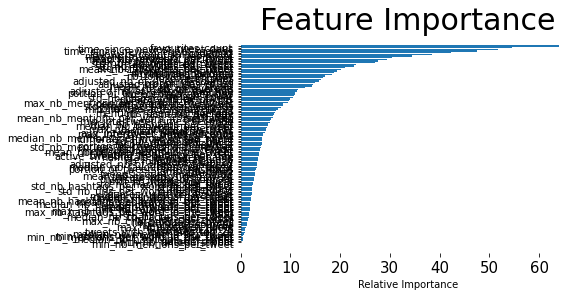

In [ ]:
# checking which are the most important features
feature_importance = rfc.fit(X_train, y_train).feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-120:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
X_train.columns[sorted_idx].values

In [ ]:
selected_feat = ['min_nb_hashtags_per_tweet',
       'min_nb_hashtags_per_word_in_the_tweet',
       'median_nb_urls_per_word_in_the_tweet',
       'median_nb_hashtags_per_word_in_the_tweet', 'default_profile',
       'max_nb_hashtags_per_word_in_the_tweet',
       'median_nb_words_per_tweet', 'min_nb_urls_per_word_in_the_tweet',
       'max_nb_characters_per_tweet', 'max_nb_words_per_tweet',
       'min_nb_words_per_tweet', 'max_nb_urls_per_word_in_the_tweet',
       'median_nb_urls_per_tweet', 'mean_nb_characters_per_tweet',
       'avg_intertweet_times_seconds', 'nb_unique_sources',
       'median_nb_mentions_per_tweet', 'max_nb_urls_per_tweet',
       'temporal_bin_2', 'median_nb_mentions_per_word_in_the_tweet',
       'temporal_bin_0', 'adjusted_nb_of_uses_of_hashtag',
       'temporal_bin_1', 'tweets_with_at_top_20', 'temporal_bin_5',
       'sources_used_on_average', 'diversity_index_of_sources',
       'std_nb_urls_per_word_in_the_tweet', 'mean_nb_words_per_tweet',
       'tweets_with_hashtags_top_20', 'nb_mentions',
       'median_nb_characters_per_tweet',
       'mean_nb_mentions_per_word_in_the_tweet', 'nb_hashtags_per_day',
       'min_nb_urls_per_tweet', 'diversity_index_of_hashtags',
       'nb_urls_per_day', 'temporal_bin_4', 'std_nb_urls_per_tweet',
       'portion_of_tweets_with_medias', 'len_screen_name',
       'max_nb_mentions_per_tweet', 'portion_of_tweets_with_mentions',
       'content_duration_days', 'numerals_ratio_in_screen_name',
       'len_description', 'numerals_in_screen_name',
       'tweets_with_urls_top_20', 'replicates_top_20',
       'hashtags_used_on_average', 'mean_nb_hashtags_per_tweet',
       'nb_unique_hashtags', 'mentions_used_on_average', 'temporal_bin_7',
       'std_nb_hashtags_per_word_in_the_tweet',
       'median_nb_favourites_per_tweet', 'std_nb_hashtags_per_tweet',
       'nb_followees_per_day', 'statuses_count',
       'min_intertweet_times_seconds', 'temporal_bin_6',
       'followers_per_followees', 'lang', 'friends_count_minus_2002',
       'median_nb_retweets_per_tweet', 'similarity',
       'std_intertweet_times_seconds', 'mean_nb_mentions_per_tweet',
       'active_tweeting_frequency_per_day', 'temporal_bin_3',
       'similarity_top_20', 'min_nb_retweets_per_tweet',
       'portion_of_tweets_with_hashtags', 'friends_count',
       'mean_nb_urls_per_word_in_the_tweet', 'max_nb_hashtags_per_tweet',
       'min_nb_characters_per_tweet', 'reputation',
       'mean_nb_hashtags_per_word_in_the_tweet',
       'adjusted_nb_of_uses_of_sources', 'tweeting_frequency_per_day',
       'nb_hashtags', 'std_nb_words_per_tweet', 'mean_nb_urls_per_tweet',
       'nb_lists', 'proportion_retweets', 'nb_unique_urls',
       'max_intertweet_times_seconds', 'std_nb_characters_per_tweet',
       'max_nb_favourites_per_tweet', 'adjusted_nb_of_uses_of_mention',
       'diversity_index_of_urls', 'adjusted_nb_of_uses_of_url', 'age',
       'std_nb_mentions_per_word_in_the_tweet',
       'std_nb_mentions_per_tweet', 'nb_mentions_per_day',
       'mean_nb_retweets_per_tweet', 'proportion_replies',
       'nb_followers_per_day', 'max_nb_mentions_per_word_in_the_tweet',
       'followees_per_followers_sq', 'replicates', 'urls_used_on_average',
       'mean_nb_favourites_per_tweet', 'proportion_original',
       'portion_of_tweets_with_urls', 'diversity_index_of_mentions',
       'coded_id', 'std_nb_retweets_per_tweet',
       'max_nb_retweets_per_tweet', 'favourites_count',
       'time_since_newest_tweet_days', 'nb_unique_mentions',
       'followers_count_minus_2002', 'std_nb_favourites_per_tweet',
       'nb_collected_tweets', 'followers_count',
       'time_since_newest_tweet_months','label']

# Train test Split

In [703]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234, shuffle=True, stratify=y)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 548 data points.
y_train has 548 data points.
X_test has 138 data points.
y_test has 138 data points.



# SVM (Baseline)

In [704]:
random_state= 2020

In [705]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', probability= True, random_state=random_state ).fit(X_train, y_train.values.ravel())
svm_model.score(X_test, y_test.values.ravel())

0.9782608695652174

# CatBoost

In [632]:
pip install catboost

In [633]:
import catboost as cgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [634]:
param_cgb = {
    'n_estimators': hp.quniform('n_estimators', 100, 200, 10),
    'learning_rate': hp.uniform("learning_rate", 0.001, 1),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 0, 2, 1),
    'bootstrap_type': hp.choice('bootstrap_type', ['Bayesian', 'Bernoulli', 'No']),
    'use_best_model': hp.choice('use_best_model', [True, False]),
    'max_depth': hp.quniform("max_depth", 2, 16, 1),
    'min_child_samples': hp.quniform("min_child_samples", 1, 20, 1),
    'scale_pos_weight' : hp.uniform('scale_pos_weight', 2.0, 6.0)
}

In [ ]:
from sklearn.metrics import accuracy_score

def objective_cgb(param_space):
    clf = cgb.CatBoostClassifier(n_estimators = int(param_space['n_estimators']),
                                 learning_rate = param_space['learning_rate'],
                                 l2_leaf_reg = param_space['l2_leaf_reg'],
                                 bootstrap_type = param_space['bootstrap_type'],
                                 use_best_model = param_space['use_best_model'],
                                 max_depth = int(param_space['max_depth']), 
                                 min_child_samples = int(param_space['min_child_samples']),
                                 scale_pos_weight = param_space['scale_pos_weight'],
                                 eval_metric = 'AUC',
                                 task_type='GPU',
                                 random_state = random_state)
    
    evaluation = [(X_train, y_train.values.ravel())] #, (X_test, y_test.values.ravel())
    
    clf.fit(X_train, y_train.values.ravel(),
            eval_set=evaluation,
            early_stopping_rounds=1000,
            verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE: {}".format(accuracy))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
%%time
from numpy.random import RandomState

trials = Trials()
best_hyperparams_cgb = fmin(fn = objective_cgb,
                            space = param_cgb,
                            algo = tpe.suggest,
                            max_evals = 20,
                            trials = trials,
                            rstate = RandomState(random_state))

SCORE: 0.9855072463768116
SCORE: 0.9855072463768116
SCORE: 0.9855072463768116
SCORE: 0.9637681159420289
SCORE: 0.9710144927536232
SCORE: 0.9710144927536232
SCORE: 0.9710144927536232
SCORE: 0.9565217391304348
SCORE: 0.9782608695652174
SCORE: 0.9637681159420289
SCORE: 0.9855072463768116
SCORE: 0.9637681159420289
SCORE: 0.9565217391304348
SCORE: 0.9565217391304348
SCORE: 0.9710144927536232
SCORE: 0.9420289855072463
SCORE: 0.9855072463768116
SCORE: 0.9492753623188406
SCORE: 0.9565217391304348
SCORE: 0.9782608695652174
100%|██████████| 20/20 [04:31<00:00, 13.58s/it, best loss: -0.9855072463768116]
CPU times: user 3min 18s, sys: 3min 18s, total: 6min 37s
Wall time: 4min 31s


In [ ]:
print(best_hyperparams_cgb)

{'bootstrap_type': 2, 'l2_leaf_reg': 1.0, 'learning_rate': 0.14428567569515868, 'max_depth': 4.0, 'min_child_samples': 3.0, 'n_estimators': 120.0, 'scale_pos_weight': 5.769578158051866, 'use_best_model': 1}


In [635]:
%%time
import catboost as cgb

cgb_model = cgb.CatBoostClassifier( bootstrap_type = "Bernoulli", l2_leaf_reg=1,learning_rate=0.1442, max_depth=4,min_child_samples=3,
                                   n_estimators=120,scale_pos_weight= 5.769578,use_best_model = False, verbose=False)\
                .fit(X_train, y_train.values.ravel())

CPU times: user 1.57 s, sys: 53.3 ms, total: 1.63 s
Wall time: 879 ms


In [787]:
#without feature selection
%%time
import catboost as cgb

cgb_model = cgb.CatBoostClassifier( bootstrap_type = "Bernoulli", l2_leaf_reg=1,learning_rate=0.1442, max_depth=4,min_child_samples=3,
                                   n_estimators=120,scale_pos_weight= 5.769578,use_best_model = False, verbose=False)\
                .fit(X_train, y_train.values.ravel())

CPU times: user 1.57 s, sys: 54 ms, total: 1.63 s
Wall time: 867 ms


# NGBoost

In [707]:
pip install ngboost

     |████████████████████████████████| 348kB 22.0MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp36-none-any.whl size=4035 sha256=8917c82df771ce42ccf593e2d5cf5d52e63bf01af2a1fff54c334af8b6d209b1
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [708]:
import ngboost as ngb
from ngboost.distns import Bernoulli
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
param_ngb = {
    'Dist': hp.choice('Dist', [Bernoulli]),
    'natural_gradient': hp.choice('natural_gradient', [False]),
    'n_estimators': hp.quniform('n_estimators', 100, 200, 10),
    'learning_rate': hp.uniform("learning_rate", 0.001, 1),
}

In [ ]:
from sklearn.metrics import accuracy_score

def objective_ngb(param_space):
    clf = ngb.NGBClassifier(Dist = param_space['Dist'],
                            natural_gradient = param_space['natural_gradient'],
                            n_estimators = int(param_space['n_estimators']),
                            learning_rate = param_space['learning_rate'],
                            random_state = random_state)

    clf.fit(X_train, y_train.values.ravel(),
            X_train, y_train.values.ravel(),
            early_stopping_rounds=1000)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE: {}".format(accuracy))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
%%time
from numpy.random import RandomState

trials = Trials()
best_hyperparams_ngb = fmin(fn = objective_ngb,
                            space = param_ngb,
                            algo = tpe.suggest,
                            max_evals = 100,
                            trials = trials,
                            rstate = RandomState(random_state))

In [ ]:
print(best_hyperparams_ngb)

{'Dist': 0, 'learning_rate': 0.02094708119607446, 'n_estimators': 120.0, 'natural_gradient': 0}


In [709]:
%%time
import ngboost as ngb

ngb_model = ngb.NGBClassifier(Dist= Bernoulli, learning_rate=0.010962010807297067, n_estimators= 170, natural_gradient=  True, random_state=random_state, verbose=False)\
                .fit(X_train, y_train.values.ravel())

CPU times: user 2.28 s, sys: 7.2 ms, total: 2.29 s
Wall time: 2.29 s


In [786]:
# without feature selection
%%time
import ngboost as ngb

ngb_model = ngb.NGBClassifier(Dist= Bernoulli, learning_rate=0.02094708119607446, n_estimators= 170, natural_gradient=  True, random_state=random_state, verbose=False)\
                .fit(X_train, y_train.values.ravel())

CPU times: user 2.26 s, sys: 11 ms, total: 2.27 s
Wall time: 2.27 s


# TabNet

In [710]:
!pip install pytorch-tabnet

In [712]:
from pytorch_tabnet.tab_model import TabNetClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
 param_tabnet = {
    'n_d': hp.quniform("n_d", 8, 64, 1),
    'n_a': hp.quniform("n_a", 8, 64, 1),
    'n_steps': hp.quniform("n_steps", 3, 10, 1),
    'gamma': hp.uniform('gamma', 1.0, 2.0),
    'n_independent': hp.quniform('n_independent', 1, 5, 1),
    'n_shared': hp.quniform('n_shared', 1, 5, 1),
    'momentum': hp.uniform('momentum', 0.01, 0.4),
    # 'lr': hp.uniform('lr', 0.001, 1),
    'lambda_sparse': hp.uniform('lambda_sparse', 0.001, 2)
}

In [711]:
from sklearn.metrics import accuracy_score

def objective_tabnet(param_space):
    clf = TabNetClassifier(n_d = int(param_space['n_d']),
                           n_a = int(param_space['n_a']),
                           n_steps = int(param_space['n_steps']),
                           gamma = param_space['gamma'], 
                           n_independent = int(param_space['n_independent']),
                           n_shared = int(param_space['n_shared']),
                           momentum = param_space['momentum'],
                          #  lr = param_space['lr'],
                           lambda_sparse = param_space['lambda_sparse'],
                           verbose=1,
                           device_name='cuda',
                           seed = 2021)
    
    clf.fit(X_train=X_train.values,
            y_train=y_train.values.ravel(),
            max_epochs=200,
            patience=15,
            batch_size=64)

    pred = clf.predict(X_test.values)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE: {}".format(accuracy))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
%%time
from numpy.random import RandomState

trials = Trials()
best_hyperparams_tabnet = fmin(fn = objective_tabnet,
                               space = param_tabnet,
                               algo = tpe.suggest,
                               max_evals = 10,
                               trials = trials,
                               rstate = RandomState(2020))

In [ ]:
best_hyperparams_tabnet

{'gamma': 1.7603491611794497,
 'lambda_sparse': 0.7866840319679153,
 'momentum': 0.18208562479960685,
 'n_a': 49.0,
 'n_d': 9.0,
 'n_independent': 4.0,
 'n_shared': 1.0,
 'n_steps': 10.0}

In [779]:
best_params_tabnet = {'gamma': 1.7791377842161835,
 'lambda_sparse': 1.6754840746659878,
 'momentum': 0.25816954686902727,
 'n_a': 45.0,
 'n_d': 19.0,
 'n_independent': 5.0,
 'n_shared': 5.0,
 'n_steps': 9.0}

tabnet_model = TabNetClassifier(device_name='cuda', seed=2020)

tabnet_model.fit(X_train.values, y_train.values.ravel(),
                 max_epochs=1000, 
                 patience=100,
                 #weights={0:1, 1:4.81},
                 batch_size=32)

Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.66802 |  0:00:00s
epoch 1  | loss: 0.43864 |  0:00:00s
epoch 2  | loss: 0.41464 |  0:00:01s
epoch 3  | loss: 0.3718  |  0:00:02s
epoch 4  | loss: 0.3238  |  0:00:02s
epoch 5  | loss: 0.2749  |  0:00:02s
epoch 6  | loss: 0.25663 |  0:00:03s
epoch 7  | loss: 0.24007 |  0:00:03s
epoch 8  | loss: 0.21831 |  0:00:04s
epoch 9  | loss: 0.19006 |  0:00:04s
epoch 10 | loss: 0.20717 |  0:00:05s
epoch 11 | loss: 0.1815  |  0:00:05s
epoch 12 | loss: 0.19803 |  0:00:06s
epoch 13 | loss: 0.17264 |  0:00:06s
epoch 14 | loss: 0.15742 |  0:00:07s
epoch 15 | loss: 0.13045 |  0:00:07s
epoch 16 | loss: 0.14313 |  0:00:08s
epoch 17 | loss: 0.12328 |  0:00:08s
epoch 18 | loss: 0.15229 |  0:00:08s
epoch 19 | loss: 0.12062 |  0:00:09s
epoch 20 | loss: 0.11541 |  0:00:10s
epoch 21 | loss: 0.1263  |  0:00:10s
epoch 22 | loss: 0.14476 |  0:00:10s
epoch 23 | loss: 0.12276 |  0:00:11s
epoch 24 | loss: 0.1

In [785]:
#without feature selection
best_params_tabnet = {'gamma': 1.7791377842161835,
 'lambda_sparse': 1.6754840746659878,
 'momentum': 0.25816954686902727,
 'n_a': 45.0,
 'n_d': 19.0,
 'n_independent': 5.0,
 'n_shared': 5.0,
 'n_steps': 9.0}

tabnet_model = TabNetClassifier(device_name='cuda', seed=2020)

tabnet_model.fit(X_train.values, y_train.values.ravel(),
                #eval_set=[(X_test, y_test)],
                 max_epochs=1000, 
                 patience=100,
                 #weights={0:4.81, 1:1},
                 batch_size=32)

Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.66802 |  0:00:00s
epoch 1  | loss: 0.43864 |  0:00:00s
epoch 2  | loss: 0.41464 |  0:00:01s
epoch 3  | loss: 0.3718  |  0:00:01s
epoch 4  | loss: 0.3238  |  0:00:02s
epoch 5  | loss: 0.2749  |  0:00:02s
epoch 6  | loss: 0.25663 |  0:00:03s
epoch 7  | loss: 0.24007 |  0:00:03s
epoch 8  | loss: 0.21831 |  0:00:04s
epoch 9  | loss: 0.19006 |  0:00:04s
epoch 10 | loss: 0.20717 |  0:00:05s
epoch 11 | loss: 0.1815  |  0:00:05s
epoch 12 | loss: 0.19803 |  0:00:06s
epoch 13 | loss: 0.17264 |  0:00:06s
epoch 14 | loss: 0.15742 |  0:00:07s
epoch 15 | loss: 0.13045 |  0:00:07s
epoch 16 | loss: 0.14313 |  0:00:08s
epoch 17 | loss: 0.12328 |  0:00:08s
epoch 18 | loss: 0.15229 |  0:00:09s
epoch 19 | loss: 0.12062 |  0:00:09s
epoch 20 | loss: 0.11541 |  0:00:10s
epoch 21 | loss: 0.1263  |  0:00:10s
epoch 22 | loss: 0.14476 |  0:00:11s
epoch 23 | loss: 0.12276 |  0:00:11s
epoch 24 | loss: 0.1

# Predictions


In [788]:
svm_y_pred_prob = pd.DataFrame(svm_model.predict_proba(X_test), index=X_test.index).rename(columns={0:'svm0', 1:'svm1'})
cgb_y_pred_prob = pd.DataFrame(cgb_model.predict_proba(X_test), index=X_test.index).rename(columns={0:'cgb0', 1:'cgb1'})
ngb_y_pred_prob = pd.DataFrame(ngb_model.predict_proba(X_test), index=X_test.index).rename(columns={0:'lgb0', 1:'lgb1'})
tabnet_y_pred_prob = pd.DataFrame(tabnet_model.predict_proba(X_test.values), index=X_test.index).rename(columns={0:'tabnet0', 1:'tabnet1'})

In [789]:
svm_y_pred_train = svm_model.predict(X_train)
svm_y_pred_test = svm_model.predict(X_test)

cgb_y_pred_train = cgb_model.predict(X_train)
cgb_y_pred_test = cgb_model.predict(X_test)

ngb_y_pred_train = ngb_model.predict(X_train)
ngb_y_pred_test = ngb_model.predict(X_test)

tabnet_y_pred_train = tabnet_model.predict(X_train.values)
tabnet_y_pred_test = tabnet_model.predict(X_test.values)

# Evaluation Report

In [790]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score

def evaluation_report(y_train, y_pred_train, y_test, y_pred_test, model_name, normalize=None):
    
    report = pd.DataFrame([np.append(confusion_matrix(y_train, y_pred_train, normalize=normalize).ravel(), 
                                    [roc_auc_score(y_train, y_pred_train), 
                                    precision_score(y_train, y_pred_train),
                                    recall_score(y_train, y_pred_train),
                                    f1_score(y_train, y_pred_train),
                                    cohen_kappa_score(y_train, y_pred_train),
                                    accuracy_score(y_train, y_pred_train)]),
                           np.append(confusion_matrix(y_test, y_pred_test, normalize=normalize).ravel(), 
                                    [roc_auc_score(y_test, y_pred_test), 
                                    precision_score(y_test, y_pred_test),
                                    recall_score(y_test, y_pred_test),
                                    f1_score(y_test, y_pred_test),
                                    cohen_kappa_score(y_test, y_pred_test),
                                    accuracy_score(y_test, y_pred_test)])],
                          index = pd.MultiIndex.from_tuples([(model_name, "Train"), (model_name, "Test")]),
                          columns = ['TNR', 'FPR', 'FNR', 'TPR', 'ROC-AUC', 'Precision', 'Recall', 'F1-score', "Cohen's kappa", 'Accuracy'])
    return report

In [783]:
pd.concat([evaluation_report(y_train, svm_y_pred_train,  y_test, svm_y_pred_test,  "SVM", 'all'),
           evaluation_report(y_train, cgb_y_pred_train, y_test, cgb_y_pred_test, "CatBoost", 'all'),
           evaluation_report(y_train, ngb_y_pred_train, y_test, ngb_y_pred_test, "NGBoost", 'all'),
           evaluation_report(y_train, tabnet_y_pred_train, y_test, tabnet_y_pred_test, "TabNet", 'all'),
          ])

TNR       FPR       FNR  ...  F1-score  Cohen's kappa  Accuracy
SVM      Train  0.824818  0.003650  0.005474  ...  0.973262       0.967762  0.990876
         Test   0.818841  0.007246  0.014493  ...  0.936170       0.923077  0.978261
CatBoost Train  0.828467  0.000000  0.000000  ...  1.000000       1.000000  1.000000
         Test   0.818841  0.007246  0.000000  ...  0.979592       0.975189  0.992754
NGBoost  Train  0.822993  0.005474  0.003650  ...  0.973545       0.968032  0.990876
         Test   0.811594  0.014493  0.021739  ...  0.893617       0.871795  0.963768
TabNet   Train  0.828467  0.000000  0.000000  ...  1.000000       1.000000  1.000000
         Test   0.818841  0.007246  0.014493  ...  0.936170       0.923077  0.978261

[8 rows x 10 columns]

In [791]:
#Without feature selection
pd.concat([evaluation_report(y_train, svm_y_pred_train,  y_test, svm_y_pred_test,  "SVM", 'all'),
           evaluation_report(y_train, cgb_y_pred_train, y_test, cgb_y_pred_test, "CatBoost", 'all'),
           evaluation_report(y_train, ngb_y_pred_train, y_test, ngb_y_pred_test, "NGBoost", 'all'),
           evaluation_report(y_train, tabnet_y_pred_train, y_test, tabnet_y_pred_test, "TabNet", 'all'),
          ])

TNR       FPR       FNR  ...  F1-score  Cohen's kappa  Accuracy
SVM      Train  0.824818  0.003650  0.005474  ...  0.973262       0.967762  0.990876
         Test   0.818841  0.007246  0.014493  ...  0.936170       0.923077  0.978261
CatBoost Train  0.828467  0.000000  0.000000  ...  1.000000       1.000000  1.000000
         Test   0.818841  0.007246  0.000000  ...  0.979592       0.975189  0.992754
NGBoost  Train  0.822993  0.005474  0.003650  ...  0.973545       0.968032  0.990876
         Test   0.811594  0.014493  0.021739  ...  0.893617       0.871795  0.963768
TabNet   Train  0.828467  0.000000  0.000000  ...  1.000000       1.000000  1.000000
         Test   0.818841  0.007246  0.014493  ...  0.936170       0.923077  0.978261

[8 rows x 10 columns]

In [663]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [664]:
from sklearn.metrics import roc_curve, auc

In [ ]:
classifiers = [svm_model, cgb_model, ngb_model, tabnet_model]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for model in classifiers:
    yproba = model.predict_proba(X_test.values)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc_score = auc(fpr, tpr)
    
    result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc_score}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

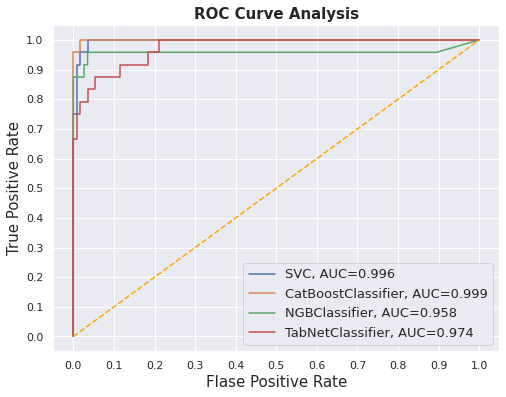

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
classifiers = [svm_model, cgb_model, ngb_model, tabnet_model]

result_table = pd.DataFrame(columns=['classifiers', 'precision', 'recall', 'ap'])

for model in classifiers:
    yproba = model.predict_proba(X_test.values)[:,1]
    
    precision, recall, _ = precision_recall_curve(y_test, yproba)
    ap_score = average_precision_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'precision':fpr, 
                                        'recall':tpr, 
                                        'ap':auc_score}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

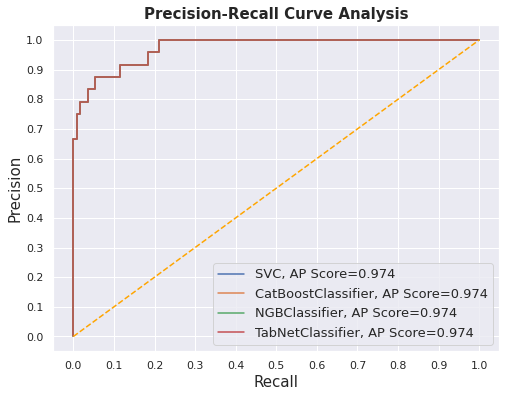

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['precision'], 
             result_table.loc[i]['recall'], 
             label="{}, AP Score={:.3f}".format(i, result_table.loc[i]['ap']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Prediction on Test Data

In [745]:
test = pd.merge(user_id, coded_id_lables_test, on="coded_id")

In [746]:
test

,coded_id,user_id,label
0,5,1145742354,NaN
1,26,1555076659,NaN
2,37,1732102699,NaN
3,40,1873016161,NaN
4,52,2286370481,NaN
...,...,...,...
76,729,6312312,NaN
77,745,18493702,NaN
78,746,121598378,NaN
79,757,459998804,NaN


In [747]:
test_df = pd.merge(test,feature, on="user_id")

In [748]:
test_df.drop(columns = test_df[['label']], inplace= True)

In [749]:
test_df

,coded_id,user_id,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,...,proportion_retweets,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,utc_offset
0,5,1145742354,1.350,11.016,6.480,210.844,1.000,1833,0 days 17:49:13.654040000,64154.0,294,09/02/2018 16:29:07,21/04/2017 15:35:00,True,False,23.149,57.563,1.883,19.000,394,0.000,17741,15739,194.956,91,-1911,1.747,ar,85,8,10 days 18:00:15.000000000,928815.0,140,113,5,0.312,3,0.400,228993,0,...,0.688,16,0.0,0.995,0.273,0.284,198.500,NaN,5870,1 days 04:05:12.883939000,101112.883939,40.822224,9.696233,1.002778,0.060,0.569035,0.075,12735.586595,0.0,0.0,0.224958,0.014,7.637982,0.018,0.053,0.101,0.073,0.058,0.171,0.332,0.194,1,0.033333,Baghdad,3.202,18,6,0,1.000,10800.0
1,26,1555076659,10.256,1.000,1.000,400.000,1.000,1688,0 days 02:22:54.759398000,8575.0,39,10/02/2018 11:58:15,01/01/2018 21:36:06,True,True,2.000,2.000,1.000,561.000,0,0.028,18,-1984,2.000,9,-1993,1.000,en,0,7,0 days 12:17:34.000000000,44254.0,144,1,1,0.036,1,0.037,1,0,...,0.000,9,0.0,0.667,0.272,0.309,400.000,NaN,6772,0 days 04:47:35.706861000,17255.706861,12.798218,0.131125,0.070534,0.002,0.070534,0.003,0.049937,0.0,0.0,0.490402,0.018,3.238548,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.500,1,0.033333,NaN,4.012,0,0,20,1.000,NaN
2,37,1732102699,5.000,50.798,9.538,307.410,2.942,1619,0 days 04:49:24.883249000,17365.0,79,29/04/2016 05:18:51,10/02/2016 00:49:27,True,False,23.584,34.283,1.285,23.453,837,0.001,1287,-715,0.621,2074,72,5.301,ar,84,6,7 days 01:31:31.000000000,610291.0,144,10,11,0.379,7,0.412,24153,0,...,0.605,83,4.0,0.383,0.263,0.245,131.667,NaN,2648,0 days 12:16:45.830767000,44205.830767,30.078062,1.370942,2.702353,0.089,0.704944,0.055,1313.805014,0.0,0.0,0.386306,0.032,7.324579,0.154,0.096,0.056,0.068,0.195,0.104,0.165,0.162,653,21.766667,Riyadh,1.636,15,13,3,1.211,10800.0
3,40,1873016161,13.793,15.045,14.117,400.000,1.000,1608,0 days 01:47:42.383459000,6462.0,29,10/02/2018 15:19:48,11/01/2018 19:04:57,True,False,11.898,29.681,1.000,77.000,5719,0.000,4642,2640,92.840,50,-1952,1.673,ar,159,11,1 days 17:38:42.000000000,149922.0,140,12,7,0.333,12,0.429,10992,0,...,0.477,16,0.0,0.989,0.311,0.346,400.000,NaN,50449,0 days 05:12:13.795170000,18733.795170,39.852534,0.931343,0.819905,0.048,0.985010,0.073,756.834552,0.0,0.0,0.394264,0.024,7.627483,0.015,0.010,0.105,0.177,0.128,0.195,0.217,0.152,0,0.

In [750]:
test_df.isnull().sum()

coded_id                              0
user_id                               0
active_tweeting_frequency_per_day     0
adjusted_nb_of_uses_of_hashtag        0
adjusted_nb_of_uses_of_mention        0
                                     ..
tweets_with_at_top_20                 0
tweets_with_hashtags_top_20           0
tweets_with_urls_top_20               0
urls_used_on_average                  0
utc_offset                           17
Length: 146, dtype: int64

In [751]:
nan_cols = [i for i in test_df.columns if test_df[i].isnull().any()]
nan_cols

['spam_in_screen_name', 'time_zone', 'utc_offset']

In [752]:
test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()

spam_in_screen_name    81
time_zone              17
utc_offset             17
dtype: int64

In [753]:
test_df.drop(columns = test_df[['user_id','spam_in_screen_name','time_zone','utc_offset']],inplace= True)

In [754]:
test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [755]:
test_df = test_df.drop(['avg_intertweet_times', 'date_newest_tweet', 'date_oldest_tweet','max_intertweet_times','min_intertweet_times','std_intertweet_times'], axis=1)

In [756]:
cat_columns = ['default_profile', 'default_profile_image','lang']

In [757]:
test_df[cat_columns]

,default_profile,default_profile_image,lang
0,True,False,ar
1,True,True,en
2,True,False,ar
3,True,False,ar
4,True,False,en
...,...,...,...
76,False,False,en
77,False,False,en
78,True,False,en
79,False,False,en


In [758]:
num_columns = test_df.copy()
num_columns = num_columns.drop(cat_columns, axis= 1)

In [759]:
X = test_df.loc[:, test_df.columns!='label']

In [760]:
X = pd.get_dummies(X, columns=cat_columns, prefix=cat_columns)
X

,coded_id,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times_seconds,content_duration_days,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,len_description,len_screen_name,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,max_nb_symbols_per_tweet,max_nb_symbols_per_word_in_the_tweet,max_nb_urls_per_tweet,max_nb_urls_per_word_in_the_tweet,max_nb_words_per_tweet,mean_nb_characters_per_tweet,mean_nb_favourites_per_tweet,mean_nb_hashtags_per_tweet,mean_nb_hashtags_per_word_in_the_tweet,...,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,default_profile_False,default_profile_True,default_profile_image_False,default_profile_image_True,lang_ar,lang_ca,lang_de,lang_en,lang_es,lang_ja,lang_pt,lang_ru,lang_tr
0,5,1.350,11.016,6.480,210.844,1.000,1833,64154.0,294,23.149,57.563,1.883,19.000,394,0.000,17741,15739,194.956,91,-1911,1.747,85,8,928815.0,140,113,5,0.312,3,0.400,228993,0,0.0,2,0.143,38,95.788413,1.463476,0.642317,0.038,...,40.822224,9.696233,1.002778,0.060,0.569035,0.075,12735.586595,0.0,0.0,0.224958,0.014,7.637982,0.018,0.053,0.101,0.073,0.058,0.171,0.332,0.194,1,0.033333,3.202,18,6,0,1.000,0,1,1,0,1,0,0,0,0,0,0,0,0
1,26,10.256,1.000,1.000,400.000,1.000,1688,8575.0,39,2.000,2.000,1.000,561.000,0,0.028,18,-1984,2.000,9,-1993,1.000,0,7,44254.0,144,1,1,0.036,1,0.037,1,0,0.0,2,0.105,34,128.475000,0.017500,0.005000,0.000,...,12.798218,0.131125,0.070534,0.002,0.070534,0.003,0.049937,0.0,0.0,0.490402,0.018,3.238548,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.500,1,0.033333,4.012,0,0,20,1.000,0,1,0,1,0,0,0,1,0,0,0,0,0
2,37,5.000,50.798,9.538,307.410,2.942,1619,17365.0,79,23.584,34.283,1.285,23.453,837,0.001,1287,-715,0.621,2074,72,5.301,84,6,610291.0,144,10,11,0.379,7,0.412,24153,0,0.0,2,0.200,37,124.473418,0.577215,3.032911,0.108,...,30.078062,1.370942,2.702353,0.089,0.704944,0.055,1313.805014,0.0,0.0,0.386306,0.032,7.324579,0.154,0.096,0.056,0.068,0.195,0.104,0.165,0.162,653,21.766667,1.636,15,13,3,1.211,0,1,1,0,1,0,0,0,0,0,0,0,0
3,40,13.793,15.045,14.117,400.000,1.000,1608,6462.0,29,11.898,29.681,1.000,77.000,5719,0.000,4642,2640,92.840,50,-1952,1.673,159,11,149922.0,140,12,7,0.333,12,0.429,10992,0,0.0,1,0.167,35,103.207500,0.260000,0.447500,0.026,...,39.852534,0.931343,0.819905,0.048,0.985010,0.073,756.834552,0.0,0.0,0.394264,0.024,7.627483,0.015,0.010,0.105,0.177,0.128,0.195,0.217,0.152,0,0.000000,31.374,20,6,5,1.000,0,1,1,0,1,0,0,0,0,0,0,0,0
4,52,3.102,4.578,16.791,271.495,25.783,1486,28021.0,177,74.491,27.395,2.022,6.245,1327,0.444,6,-1996,0.375,16,-1986,1.884,16,10,14242377.0,140,0,8,0.292,8,0.333,6181,0,0.0,1,0.100,37,110.723133,0.000000,0.621129,0.026,...,28.340305,0.000000,1.350433,0.053,0.702029,0.041,799.857124,0.0,0.0,0.455257,0.026,5.951754,0.089,0.138,0.118,0.138,0.146,0.131,0.113,0.126,990,33.000000,4.122,20,5,3,2.556,0,1,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...

In [761]:
from sklearn.preprocessing import PowerTransformer

scalers = {}

for col in num_columns.columns:
  scalers[col] = PowerTransformer().fit(X[col].values.reshape(-1, 1))
  X.loc[:,col] = scalers[col].transform(X[col].values.reshape(-1, 1))

In [762]:
X.shape

(81, 146)

In [807]:
output = cgb_model.predict(X)

In [808]:
test = pd.DataFrame(output)


In [812]:
coded_id_lables_test ['label'] = test[0]

In [819]:
coded_id_lables_test.drop(columns="coded_id", inplace= True)

In [821]:
coded_id_lables_test.to_csv("coded_id_lables_test.csv")